In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as ml
from scipy.interpolate import interp1d
%matplotlib inline
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=16)

In [2]:
g0 = 3100
g1 = 380
g3 = 290
g4 = 141
g2 = -15
g5 = 50
Dt2 = 0.0
Dt3=0.0
Dtp = 10.5

In [3]:
def getBMatrix(kx, ky, Dt1, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt],
                   [0*idt, 0*idt, -v4*p, g1*idt,(-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, -v4*p, g1*idt, (Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [4]:
pauli0 = np.eye(2)
pauli1 = np.array([[0,1],[1,0]])
pauli2 = np.array([[0,-1j],[1j,0]])
pauli3 = np.diag([1,-1])
diag = np.eye(8)


def getSupMatrix(kx, ky, Dt1, mu, xi, Delta, SorP):
    H0 = np.kron(pauli3, getBMatrix(kx, ky, Dt1, mu, xi))
    kx, ky = np.asarray(kx), np.asarray(ky)
    kx = kx if np.ndim(kx)==0 else kx[...,np.newaxis, np.newaxis]
    ky = ky if np.ndim(ky)==0 else ky[...,np.newaxis, np.newaxis]
    if SorP:
        Sup = Delta*np.kron(pauli1, diag)
    else:
        Sup = (Delta/np.sqrt(kx**2+ky**2))*(np.kron(pauli1, kx*diag)-
                     np.kron(pauli2, ky*diag))
    return H0+Sup

In [5]:
dpath = "/home/aghazary/Documents/StonerABCAData/"
with open(dpath+'U0.0KV0.0KDataABCAGrapheneABCT01.npy', 'rb') as f:
    a4ABCA = np.load(f)
dmu = 0.002
DlistABCA =3*np.arange(0,40.1,0.25)
mulABCA = np.arange(-150,150.0001,dmu)
mulABCA = mulABCA[1:-1]
nuTABCA = a4ABCA[:,1:-1]
fdrABCA = np.array([interp1d(nuTABCA[i], mulABCA, kind='linear') for i in range(len(nuTABCA))])

In [27]:
Dt = 69
ind = np.where(np.abs(np.abs(Dt)-DlistABCA)<0.01)[0][0]
mu=fdrABCA[ind](2.0)
print(mu)

68.77335469257626


In [10]:
kx = np.linspace(-0.1,0.1,200)
Dt = 69
ind = np.where(np.abs(np.abs(Dt)-DlistABCA)<0.01)[0][0]
mu=fdrABCA[ind](1.2)
w0,v0 = np.linalg.eigh(getBMatrix(kx, 0.0, Dt, mu, 1))
w,v = np.linalg.eigh(getSupMatrix(kx,0.0,Dt,mu,1,0.1, False))

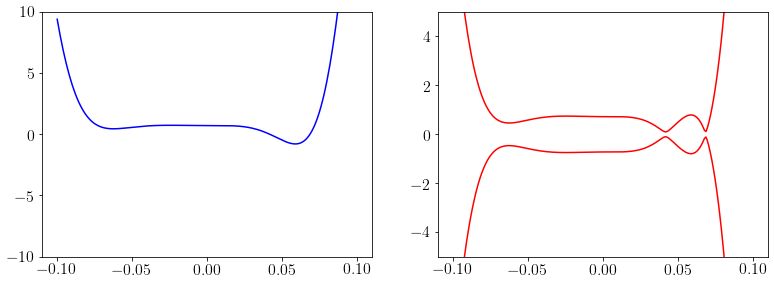

In [7]:
ml.rcParams['figure.figsize'] = (13.0, 4.5)
fig, (ax1, ax2)=plt.subplots(1,2)
ax1.plot(kx, w0,'b')
ax1.set_ylim([-10,10])
ax2.plot(kx, w,'r')
ax2.set_ylim([-5,5])
plt.show()

In [12]:
KY, KX = np.meshgrid(kx, kx)
w, v = np.linalg.eigh(getBMatrix(KX, KY, Dt, 0.0, 1))

(-0.15, 0.15)

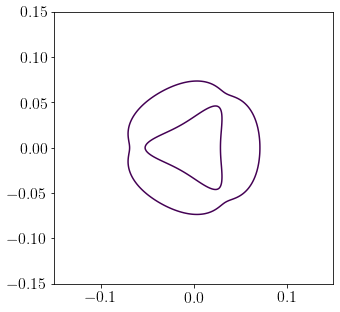

In [18]:
mu=fdrABCA[ind](2.0)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
plt.contour(KX,KY,w[:,:,4], [mu])
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])

In [19]:
kr, st = np.linspace(-0.1,0.1, 500, retstep=True)
KY, KX = np.meshgrid(kr, kr)
Dt=69
ind = np.where(np.abs(np.abs(Dt)-DlistABCA)<0.01)[0][0]
mu=fdrABCA[ind](2.0)
Delta=0.1
wgK, vgK=np.linalg.eigh(getSupMatrix(KX,KY,Dt,mu,1,Delta, False))
wgKp, vgKp=np.linalg.eigh(getSupMatrix(KX,KY,Dt,mu,-1,Delta, False))
wg0K, vg0K=np.linalg.eigh(getSupMatrix(KX,KY,Dt,mu,1,Delta, True))
wg0Kp, vg0Kp=np.linalg.eigh(getSupMatrix(KX,KY,Dt,mu,-1,Delta, True))

In [20]:
wg,_=np.linalg.eigh(getBMatrix(KX, KY, Dt, mu, 1))
wgp,_=np.linalg.eigh(getBMatrix(KX, KY, Dt, mu, -1))

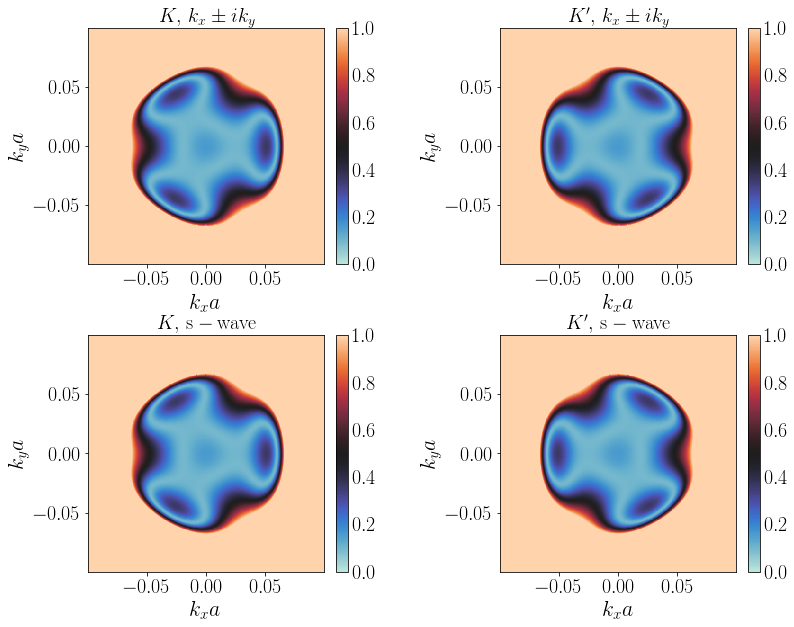

In [43]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (12.0, 10)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2)
gs.update(wspace=0.6, hspace=0.3)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
cmap2=sns.color_palette("icefire", as_cmap=True)

ax1 = fig.add_subplot(gs[0, 0])
pc1=ax1.pcolormesh(KX,KY,wgK[:,:,8],rasterized=True,vmin=0.0,vmax=1,cmap=cmap2)
#ax1.contour(KX,KY,wgK[:,:,8],[mu],colors='k')
axins = inset_axes(ax1, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0)
cbar1=plt.colorbar(pc1, cax=axins)
cbar1.ax.tick_params(size=0)
ax1.set_xlabel(r'$k_xa$',fontsize=22)
ax1.set_ylabel(r'$k_ya$',fontsize=22)
ax1.set_yticks([-0.05,0,0.05])
ax1.set_xticks([-0.05,0,0.05])
ax1.set(adjustable='box', aspect='equal')
ax1.set_title(r"$K,\,k_x\pm i k_y$",fontsize=20)

ax2 = fig.add_subplot(gs[0, 1])
pc2=ax2.pcolormesh(KX,KY,wgKp[:,:,8],rasterized=True,vmin=0.0,vmax=1,cmap=cmap2)
axins = inset_axes(ax2, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0)
cbar2=plt.colorbar(pc2, cax=axins)
cbar2.ax.tick_params(size=0)
ax2.set_xlabel(r'$k_xa$',fontsize=22)
ax2.set_ylabel(r'$k_ya$',fontsize=22)
ax2.set_yticks([-0.05,0,0.05])
ax2.set_xticks([-0.05,0,0.05])
ax2.set(adjustable='box', aspect='equal')
ax2.set_title(r"$K^\prime,\,k_x\pm i k_y$",fontsize=20)

ax3 = fig.add_subplot(gs[1, 0])
pc3=ax3.pcolormesh(KX,KY,wg0K[:,:,8],rasterized=True,vmin=0,vmax=1.0,cmap=cmap2)
axins = inset_axes(ax3, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0)
cbar3=plt.colorbar(pc3, cax=axins)
cbar3.ax.tick_params(size=0)
ax3.set_xlabel(r'$k_xa$',fontsize=22)
ax3.set_ylabel(r'$k_ya$',fontsize=22)
ax3.set_yticks([-0.05,0,0.05])
ax3.set_xticks([-0.05,0,0.05])
ax3.set(adjustable='box', aspect='equal')
ax3.set_title(r"$K,\,\mathrm{s-wave}$",fontsize=20)

ax4 = fig.add_subplot(gs[1, 1])
pc4=ax4.pcolormesh(KX,KY,wg0Kp[:,:,8],rasterized=True,vmin=0.0,vmax=1.0,cmap=cmap2)
axins = inset_axes(ax4, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax4.transAxes,
                   borderpad=0)
cbar4=plt.colorbar(pc4, cax=axins)
cbar4.ax.tick_params(size=0)
ax4.set_xlabel(r'$k_xa$',fontsize=22)
ax4.set_ylabel(r'$k_ya$',fontsize=22)
ax4.set_yticks([-0.05,0,0.05])
ax4.set_xticks([-0.05,0,0.05])
ax4.set(adjustable='box', aspect='equal')
ax4.set_title(r"$K^\prime,\,\mathrm{s-wave}$",fontsize=20)


plt.tight_layout()

In [21]:
rov = np.einsum('ijk, ijk->ij', np.conj(vgK[:-1,:,:,8]), vgK[1:,:,:,8])
uov = np.einsum('ijk, ijk->ij', np.conj(vgK[:,:-1,:,8]), vgK[:,1:,:,8])
rov = rov / np.abs(rov)
uov = uov / np.abs(uov)
bK = np.log(rov[:,:-1]*uov[1:,:]/(rov[:,1:]*uov[:-1,:]))/st**2
rov = np.einsum('ijk, ijk->ij', np.conj(vgKp[:-1,:,:,8]), vgKp[1:,:,:,8])
uov = np.einsum('ijk, ijk->ij', np.conj(vgKp[:,:-1,:,8]), vgKp[:,1:,:,8])
rov = rov / np.abs(rov)
uov = uov / np.abs(uov)
bKp = np.log(rov[:,:-1]*uov[1:,:]/(rov[:,1:]*uov[:-1,:]))/st**2
rov = np.einsum('ijk, ijk->ij', np.conj(vg0K[:-1,:,:,8]), vg0K[1:,:,:,8])
uov = np.einsum('ijk, ijk->ij', np.conj(vg0K[:,:-1,:,8]), vg0K[:,1:,:,8])
rov = rov / np.abs(rov)
uov = uov / np.abs(uov)
b0K = np.log(rov[:,:-1]*uov[1:,:]/(rov[:,1:]*uov[:-1,:]))/st**2
rov = np.einsum('ijk, ijk->ij', np.conj(vg0Kp[:-1,:,:,8]), vg0Kp[1:,:,:,8])
uov = np.einsum('ijk, ijk->ij', np.conj(vg0Kp[:,:-1,:,8]), vg0Kp[:,1:,:,8])
rov = rov / np.abs(rov)
uov = uov / np.abs(uov)
b0Kp = np.log(rov[:,:-1]*uov[1:,:]/(rov[:,1:]*uov[:-1,:]))/st**2

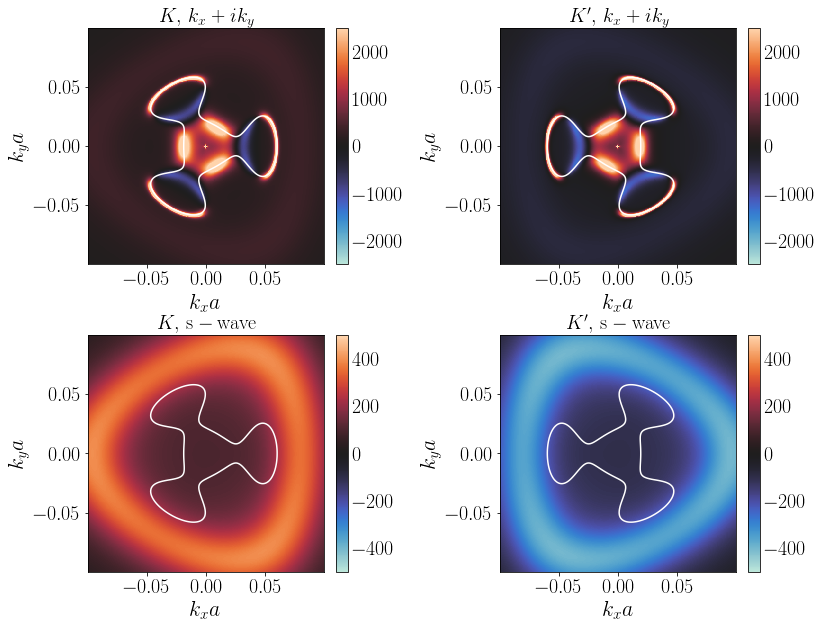

In [55]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (12.0, 10)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2)
gs.update(wspace=0.6, hspace=0.3)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
cmap2=sns.color_palette("icefire", as_cmap=True)

ax1 = fig.add_subplot(gs[0, 0])
pc1=ax1.pcolormesh(KX[:-1,:-1],KY[:-1,:-1],np.imag(bK),rasterized=True,vmin=-2500.0,vmax=2500.0,cmap=cmap2)
ax1.contour(KX,KY,wg[:,:,4],[0.0],colors="w")
axins = inset_axes(ax1, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0)
cbar1=plt.colorbar(pc1, cax=axins)
cbar1.ax.tick_params(size=0)
ax1.set_xlabel(r'$k_xa$',fontsize=22)
ax1.set_ylabel(r'$k_ya$',fontsize=22)
ax1.set_yticks([-0.05,0,0.05])
ax1.set_xticks([-0.05,0,0.05])
ax1.set(adjustable='box', aspect='equal')
ax1.set_title(r"$K,\,k_x+i k_y$",fontsize=20)

ax2 = fig.add_subplot(gs[0, 1])
pc2=ax2.pcolormesh(KX[:-1,:-1],KY[:-1,:-1],np.imag(bKp),rasterized=True,vmin=-2500.0,vmax=2500.0,cmap=cmap2)
ax2.contour(KX,KY,wgp[:,:,4],[0.0],colors="w")
axins = inset_axes(ax2, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0)
cbar2=plt.colorbar(pc2, cax=axins)
cbar2.ax.tick_params(size=0)
ax2.set_xlabel(r'$k_xa$',fontsize=22)
ax2.set_ylabel(r'$k_ya$',fontsize=22)
ax2.set_yticks([-0.05,0,0.05])
ax2.set_xticks([-0.05,0,0.05])
ax2.set(adjustable='box', aspect='equal')
ax2.set_title(r"$K^\prime,\,k_x+i k_y$",fontsize=20)

ax3 = fig.add_subplot(gs[1, 0])
pc3=ax3.pcolormesh(KX[:-1,:-1],KY[:-1,:-1],np.imag(b0K),rasterized=True,vmin=-500.0,vmax=500.0,cmap=cmap2)
ax3.contour(KX,KY,wg[:,:,4],[0.0],colors="w")
axins = inset_axes(ax3, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0)
cbar3=plt.colorbar(pc3, cax=axins)
cbar3.ax.tick_params(size=0)
ax3.set_xlabel(r'$k_xa$',fontsize=22)
ax3.set_ylabel(r'$k_ya$',fontsize=22)
ax3.set_yticks([-0.05,0,0.05])
ax3.set_xticks([-0.05,0,0.05])
ax3.set(adjustable='box', aspect='equal')
ax3.set_title(r"$K,\,\mathrm{s-wave}$",fontsize=20)

ax4 = fig.add_subplot(gs[1, 1])
pc4=ax4.pcolormesh(KX[:-1,:-1],KY[:-1,:-1],np.imag(b0Kp),rasterized=True,vmin=-500.0,vmax=500.0,cmap=cmap2)
ax4.contour(KX,KY,wgp[:,:,4],[0.0],colors="w")
axins = inset_axes(ax4, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax4.transAxes,
                   borderpad=0)
cbar4=plt.colorbar(pc4, cax=axins)
cbar4.ax.tick_params(size=0)
ax4.set_xlabel(r'$k_xa$',fontsize=22)
ax4.set_ylabel(r'$k_ya$',fontsize=22)
ax4.set_yticks([-0.05,0,0.05])
ax4.set_xticks([-0.05,0,0.05])
ax4.set(adjustable='box', aspect='equal')
ax4.set_title(r"$K^\prime,\,\mathrm{s-wave}$",fontsize=20)


plt.tight_layout()
#plt.savefig('BerryCurvatureBDG.png', dpi=200)

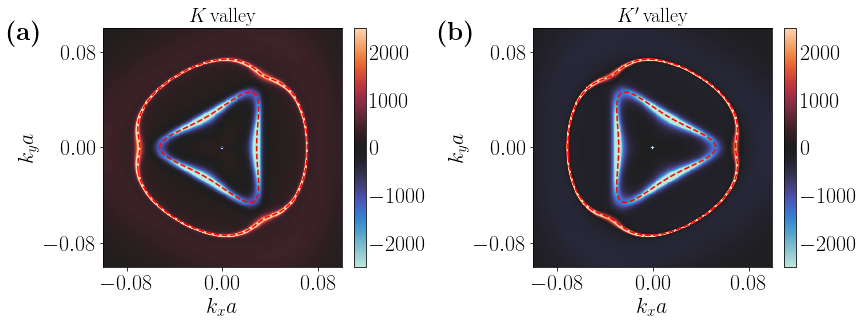

In [22]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=22)
ml.rcParams['figure.figsize'] = (12.0, 5)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2)
gs.update(wspace=0.8, hspace=0.3)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
cmap2=sns.color_palette("icefire", as_cmap=True)

ax1 = fig.add_subplot(gs[0, 0])
pc1=ax1.pcolormesh(KX[:-1,:-1],KY[:-1,:-1],np.imag(bK),rasterized=True,vmin=-2500.0,vmax=2500.0,cmap=cmap2)
ax1.contour(KX,KY,wg[:,:,4],[0.0],colors="r",linestyles='dashed')
axins = inset_axes(ax1, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0)
cbar1=plt.colorbar(pc1, cax=axins)
cbar1.ax.tick_params(size=0)
ax1.set_xlabel(r'$k_xa$',fontsize=22)
ax1.set_ylabel(r'$k_ya$',fontsize=22)
ax1.set_yticks([-0.08,0,0.08])
ax1.set_xticks([-0.08,0,0.08])
ax1.set(adjustable='box', aspect='equal')
ax1.set_title(r"$K\,\mathrm{valley}$",fontsize=20)

ax2 = fig.add_subplot(gs[0, 1])
pc2=ax2.pcolormesh(KX[:-1,:-1],KY[:-1,:-1],np.imag(bKp),rasterized=True,vmin=-2500.0,vmax=2500.0,cmap=cmap2)
ax2.contour(KX,KY,wgp[:,:,4],[0.0],colors="r",linestyles='dashed')
axins = inset_axes(ax2, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0)
cbar2=plt.colorbar(pc2, cax=axins)
cbar2.ax.tick_params(size=0)
ax2.set_xlabel(r'$k_xa$',fontsize=22)
ax2.set_ylabel(r'$k_ya$',fontsize=22)
ax2.set_yticks([-0.08,0,0.08])
ax2.set_xticks([-0.08,0,0.08])
ax2.set(adjustable='box', aspect='equal')
ax2.set_title(r"$K^\prime\,\mathrm{valley}$",fontsize=20)
plt.tight_layout()


ax1.text(-0.18, 0.09, r"{\bf(a)}", fontsize=26, weight='bold')
ax2.text(-0.18,0.09, r"{\bf(b)}", fontsize=26, weight='bold')

plt.savefig('BerryCurvatureBDGAn.pdf')

In [99]:
mu

array(60.08372818)

In [20]:
st**2*(np.sum(np.imag(bK))+np.sum(np.imag(bKp)))/(np.pi)

3.999995064847094

In [64]:
2*st**2*(np.sum(np.imag(b0K))+np.sum(np.imag(b0Kp)))/(2*np.pi)

0.0

In [70]:
(np.sum(np.imag(b0K))+np.sum(np.imag(b0Kp)))/np.sum(np.imag(b0K))

0.0

In [23]:
st**2*(np.sum(np.imag(bKp))-np.sum(np.imag(b0Kp)))/(2*np.pi)

-5.505003248088502e-06

In [72]:
st**2*(np.sum(np.imag(b0K)))/np.pi

3.092616272456384